In [1]:
%pwd

'/Users/soniamankin/python_scripts'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Part A: Data Cleaning & Exploratory Analysis

1. Import full dataset using pandas

In [2]:
df_raw = pd.read_csv('~/Downloads/bottle.csv')

/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


    Verify that shape is: (864863,74)

In [3]:
df_raw.shape

(864863, 74)

2. Limit the dataset to the following columns [T_degC,SaInty,STheta] then remove all NaN and NA values

In [4]:
cols = ['T_degC','Salnty','STheta']

In [5]:
df_raw = df_raw[cols]

In [6]:
df_raw.dropna(inplace=True)

    Verify the shape is: (812174, 3)

In [7]:
df_raw.shape

(812174, 3)

3. Build the following plots using matplotlib: 
        a) Scatter: Salnty (salinity of water) vs T_degC

Text(0.5, 1.0, 'Salinity vs Temperature')

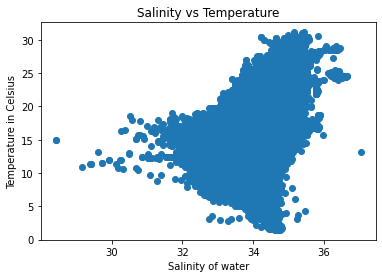

In [8]:
plt.scatter(df_raw.Salnty,df_raw.T_degC)
plt.xlabel('Salinity of water')
plt.ylabel('Temperature in Celsius')
plt.title('Salinity vs Temperature')

        b) Scatter: STheta (density of water) vs T_degC

Text(0.5, 1.0, 'Density vs Temperature')

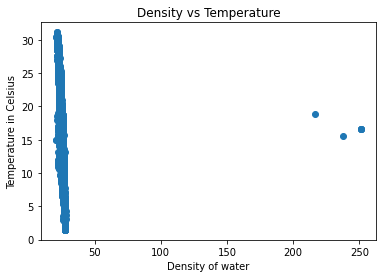

In [9]:
plt.scatter(df_raw.STheta,df_raw.T_degC)
plt.xlabel('Density of water')
plt.ylabel('Temperature in Celsius')
plt.title('Density vs Temperature')

4. Build the following plot using seaborn:
        a) Distribution of T_degC (hint: distplot will be helpful here) 

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T_degC', ylabel='Density'>

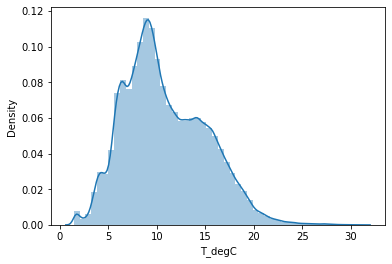

In [10]:
sns.distplot(df_raw.T_degC)

5. Remove obvious outliers from step 3b

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='STheta', ylabel='Density'>

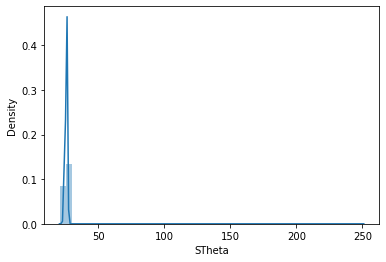

In [11]:
sns.distplot(df_raw.STheta)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='STheta', ylabel='Density'>

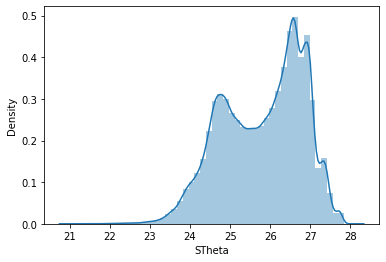

In [12]:
sns.distplot(df_raw[df_raw.STheta<200].STheta)

In [13]:
df_clean = df_raw[df_raw.STheta<200]

    Shape for clean data will be: (812168, 3)


In [14]:
df_clean.shape

(812168, 3)

6. Plot 3b again – does it look better? Explain!


Text(0.5, 1.0, 'Density vs Temperature')

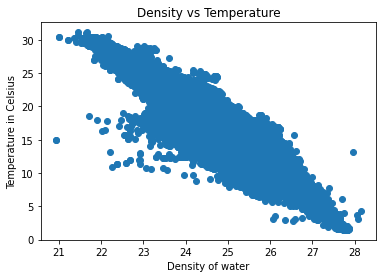

In [15]:
plt.scatter(df_clean.STheta,df_clean.T_degC)
plt.xlabel('Density of water')
plt.ylabel('Temperature in Celsius')
plt.title('Density vs Temperature')

The distribution is seen a lot more clearly here than before because we took out the outliers so there's a clear negative trend between density and temperature, before the trend was harder to picture because the outliers skewed the appearance of the scatterplot. 

### Part B: Train & Test Split:

In [16]:
from sklearn.model_selection import train_test_split

Our X matrix (features / independent variables) will be: [Salnty, STheta]

In [17]:
X = df_clean[['Salnty','STheta']]

Our y matrix (target / dependent variable) will be: T_degC

In [19]:
y = df_clean['T_degC']

Build out the following:
- X_train
- X_test
- y_train
- y_test

Make sure to add a seed (called random_state in train_test_split) so your split is reproducible.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Part C: Linear Regression Using Normal Equation - Coded In Python



In [21]:
import numpy as np

1. Build the normal equation using numpy & fit using your training data (X_train & y_train).
    - Note: Make sure to include an intercept value of 1 for every observation in your X_train.

In [30]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

2. Print out the coefficients - we will need to compare these to the output in Part 4


In [32]:
theta_best

array([35.63567092,  3.11170178, -5.03898123])

3. Predict T_degC for the test data using the fitted values in b.
    - Make sure to include an intercept value of 1 for every observation in your X_test.
     - Call predictions y_pred



In [38]:
X_new_b = np.c_[np.ones((len(X_test), 1)), X_test]  # add x0 = 1 to each instance
y_pred = X_new_b.dot(theta_best)
y_pred

array([ 7.88448234,  7.14977794,  5.22688748, ..., 17.98721791,
       10.81274785, 10.65247044])

4. Calculate the following for the test data:
    - mean squared error
    - r-squared
    - explained variance

In [40]:
import sklearn.metrics as sk

In [44]:
print(f'The mean squared error is: {sk.mean_squared_error(y_test,y_pred)}')

The mean squared error is: 0.23306805424965596


In [45]:
print(f'The r-squared is: {sk.r2_score(y_test,y_pred)}')

The r-squared is: 0.9869253631507664


In [46]:
print(f'The explained variance is: {sk.explained_variance_score(y_test,y_pred)}')

The explained variance is: 0.9869253631545096


5. Create a scatterplot that shows actual versus predicted values for the T_degC.

Text(0.5, 1.0, 'Actual vs Predicted T_degC')

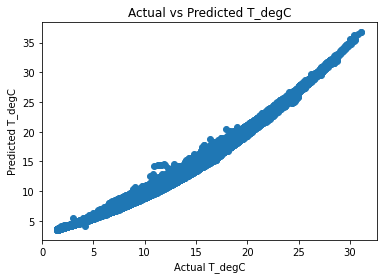

In [49]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual T_degC')
plt.ylabel('Predicted T_degC')
plt.title('Actual vs Predicted T_degC')

### Part D: Using sklearn API



1. Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train.
    - Note: sklearn will automatically add the intercept term, so you do not need to do this here. 

In [51]:
from sklearn import linear_model

In [52]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

2. Print out the coefficients (including the intercept)
    - Note: These should be EXACTLY the same as what you found in Part C step 2


In [54]:
print(f'The coefficients are: {reg.coef_}')

The coefficients are: [ 3.11170178 -5.03898123]


In [55]:
print(f'The intercept is: {reg.intercept_}')

The intercept is: 35.635670918471234


3. Predict T_degC for the test data using the fitted values in b.
    - Call predictions y_pred_sklearn

In [57]:
y_pred_sklearn = reg.predict(X_test)

4. Calculate the following for the test data:
    - mean squared error
    - r-squared
    - explained variance

In [59]:
print(f'The mean squared error is: {sk.mean_squared_error(y_test,y_pred_sklearn)}')

The mean squared error is: 0.23306805424959215


In [60]:
print(f'The r-squared is: {sk.r2_score(y_test,y_pred_sklearn)}')

The r-squared is: 0.98692536315077


In [61]:
print(f'The explained variance is: {sk.explained_variance_score(y_test,y_pred_sklearn)}')

The explained variance is: 0.9869253631545132


5. Create a scatterplot that shows actual versus predicted values for the T_degC.

Text(0.5, 1.0, 'Actual vs Predicted T_degC for Sklearn')

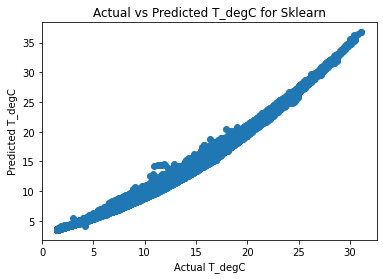

In [64]:
plt.scatter(y_test,y_pred_sklearn)
plt.xlabel('Actual T_degC')
plt.ylabel('Predicted T_degC')
plt.title('Actual vs Predicted T_degC for Sklearn')

### Part E: Conceptual Questions

#### 1. Why is it important to have a test set?


The test dataset serves as a benchmark to assess the model's ability to generalize to new data. By evaluating the model's performance on the test dataset, we can determine its accuracy, precision, recall, and other metrics.

A test dataset can also help in tuning the hyperparameters of the model. Hyperparameters are the parameters of the model that cannot be learned from the data. By evaluating the model's performance on the test dataset with different hyperparameter settings, we can find the optimal values that yield the best results.

#### 2. If the normal equation always provides a solution, when would we not want to use it?

We would not want to use the normal equation because it's not always the most efficient or accurate especially for datasets that have more than 10k features (according to Andrew Ng at Stanford University https://towardsdatascience.com/normal-equation-a-matrix-approach-to-linear-regression-4162ee170243#:~:text=Limitations%3A,for%20more%20than%2010K%20features)

The normal equation is also only used to solve OLS linear relationships which is not always the case for the data's distribution. 

#### 3. How might we improve the fit of our models from Part C & D?
- Note: There are lots of possible answers to this section - just describe one in detail. 


We can remove more outliers from our dataset in order to improve the fit of our model. If we look at the distribution of STheta at the beginning we removed the very high outliers but we can also remove some of the outliers from the lower end. I ran the model with additional filtered outliers and it boosted the R2 from: 0.98692536315077 to 0.9879271920322804.

<AxesSubplot:xlabel='STheta', ylabel='Count'>

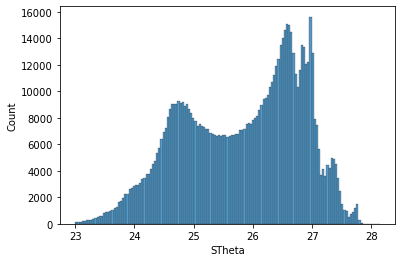

In [72]:
sns.histplot(df_clean[df_clean.STheta>23].STheta)

In [83]:
df_clean2 = df_clean[df_clean.STheta>23]
X_1 = df_clean2[['Salnty','STheta']]
y_1 = df_clean2['T_degC']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.33, random_state=42)
reg1 = linear_model.LinearRegression()
reg1.fit(X_train1,y_train1)
y_pred_sklearn1 = reg1.predict(X_test1)

In [84]:
print(f'The new R2 is: {sk.r2_score(y_test1,y_pred_sklearn1)}')

The new R2 is: 0.9879271920322804


#### 4. As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff. 

Bias refers to the difference between the predicted values and the actual values. Variance refers to the sensitivity of the model to small fluctuations in the training data. The tradeoff in bias and variance illustrates the balance between underfitting and overfitting a model (respectively). 

#### 5. In a linear regression model, how might we reduce bias?


We can reduce bias by adding additional features. 

#### 6. In a linear regression model, how might we reduce variance? 

We can reduce variance by adding more data so that your model is less prone to overfitting.